In [33]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import os
from sklearn.preprocessing import LabelEncoder
le_employement = LabelEncoder()
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight

os.chdir('/Users/admin/Desktop/AXA')

In [35]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [37]:
df[df.duplicated(keep=False)].sum().sum()

0.0

In [39]:
df=pd.read_csv('depression_data.csv')

In [41]:
df.drop(['Name'], axis=1, inplace=True)

In [11]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [13]:
X[:, 6] = le_employement.fit_transform(X[:, 6])

le_mental_illness = LabelEncoder()
X[:, 11] = le_mental_illness.fit_transform(X[:, 11])

le_substance_abuse = LabelEncoder()
X[:, 12] = le_substance_abuse.fit_transform(X[:, 12])

le_fam_history = LabelEncoder()
X[:, 13] = le_fam_history.fit_transform(X[:, 13])

le = LabelEncoder()
y = le.fit_transform(y)

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 2, 4, 5, 8, 9, 10])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [25]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

In [27]:
class_weight_dict

{0: 0.745875802821399, 1: 1.5167734975596472}

# best model 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The f1 score for the testing data: 0.41084252267912436
              precision    recall  f1-score   support

           0       0.70      0.61      0.65     83402
           1       0.37      0.46      0.41     40729

    accuracy                           0.56    124131
   macro avg       0.53      0.54      0.53    124131
weighted avg       0.59      0.56      0.57    124131



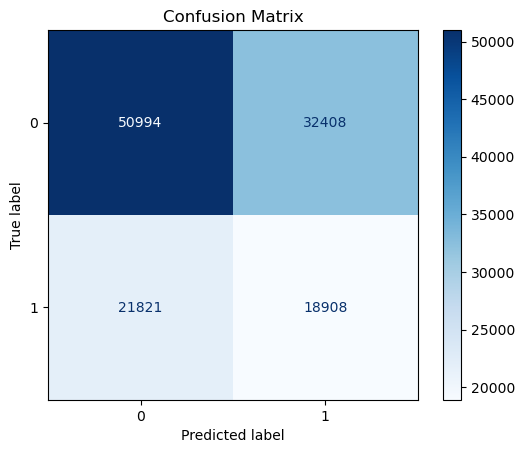

In [31]:
#importing and training the model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight={0: 0.745875802821399, 1: 1.5167734975596472})
lr.fit(X_train, y_train)

# Predicting on the test data
pred_test = lr.predict(X_test)

#Calculating and printing the f1 score 
f1_test = f1_score(y_test, pred_test)
print('The f1 score for the testing data:', f1_test)

#Ploting the confusion matrix
confusion_matrix(y_test, pred_test)
print(classification_report(y_test, pred_test))

cm = confusion_matrix(y_test, pred_test)
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

The f1 score for the testing data: 0.21990763979520128
              precision    recall  f1-score   support

           0       0.67      0.85      0.75     55559
           1       0.35      0.16      0.22     27195

    accuracy                           0.62     82754
   macro avg       0.51      0.51      0.49     82754
weighted avg       0.57      0.62      0.58     82754



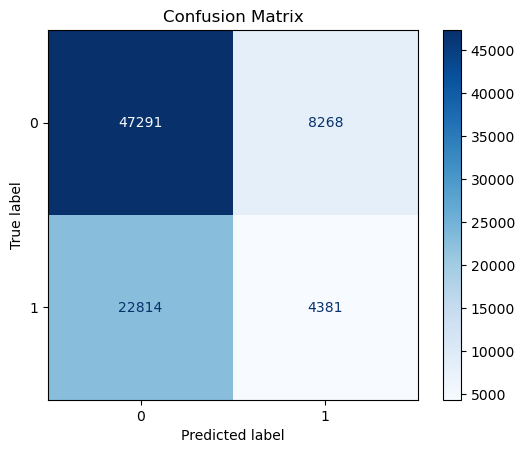

In [101]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100,class_weight={0: 0.26, 1: 0.73})
rfc.fit(X_train, y_train)

# Predicting on the test data
pred_test = rfc.predict(X_test)

#Calculating and printing the f1 score 
f1_test = f1_score(y_test, pred_test)
print('The f1 score for the testing data:', f1_test)

#Ploting the confusion matrix
confusion_matrix(y_test, pred_test)
print(classification_report(y_test, pred_test))

cm = confusion_matrix(y_test, pred_test)
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import klib

klib.corr_plot(mpg)